In [4]:
#We will start by importing all the neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# The code below is used for splitting the dataset into 2.One for Training the model and the other for testing its perfomance
from sklearn.model_selection import train_test_split
# The model name as written is Linear regression
from sklearn.linear_model import LinearRegression

# The module below provides a range of metrics used for evaluating the perfomance of the model
from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model

In [5]:
# We will  then load the dataset
df =pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.shape

(1338, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.isnull().sum().sum()

0

C:\Users\stilinski\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


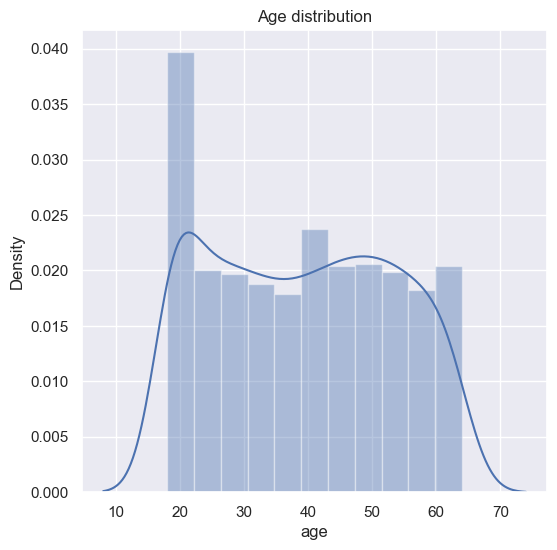

In [10]:
# below we will be looking for the age distribution using a distplot

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age distribution')
plt.show()

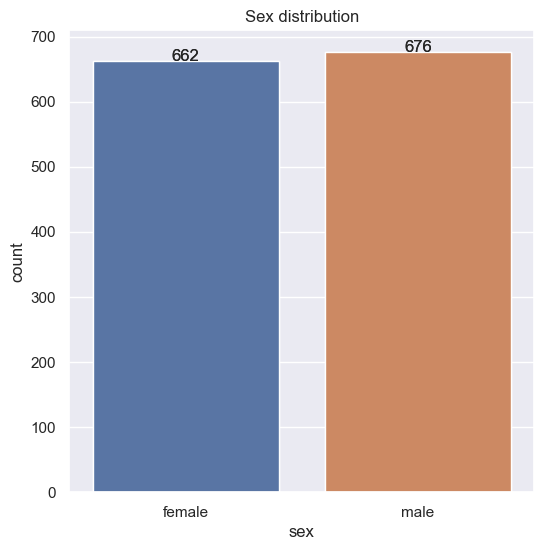

In [11]:
# We will be looking for a count of each sex using a countplot

plt.figure(figsize =(6,6))
sns.countplot(x='sex',data=df)
plt.title('Sex distribution')
ax = sns.countplot(x='sex', data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, height, ha="center")

plt.show()


C:\Users\stilinski\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


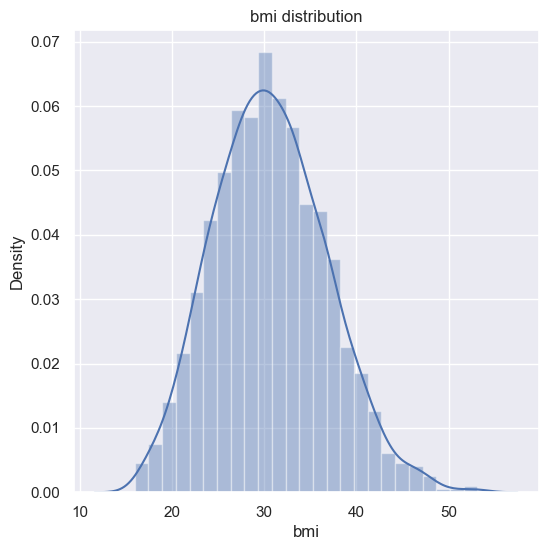

In [12]:
# We will be looking for a bmi distribution using the distplot

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('bmi distribution')
plt.show()

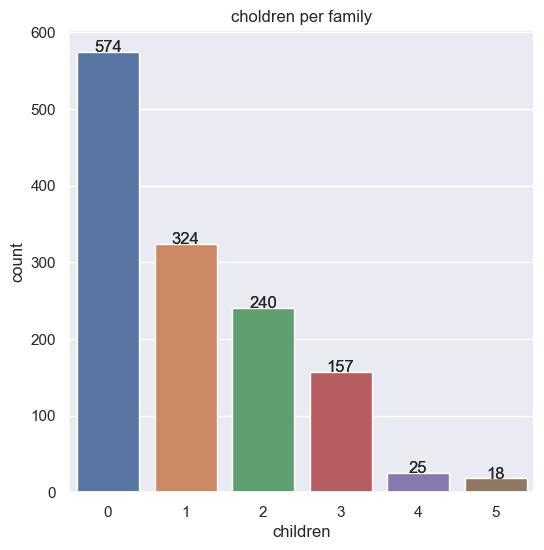

In [13]:

#in the code below we will be looking for the value of each count of each family and number of children using a countplot
plt.figure(figsize =(6,6))
sns.countplot(x='children',data=df)
plt.title('choldren per family')
ax = sns.countplot(x='children', data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, height, ha="center")

plt.show()

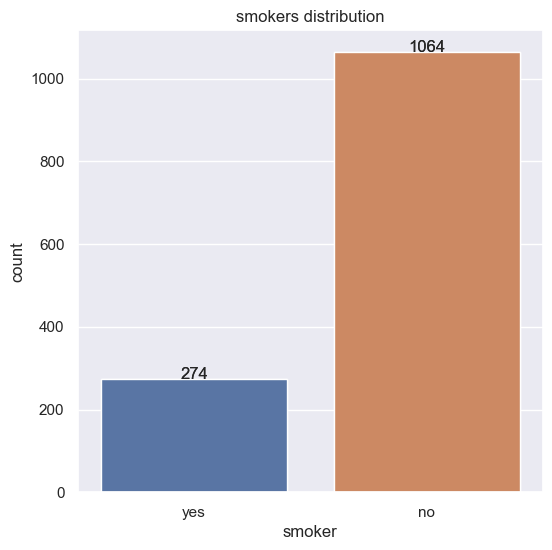

In [14]:
#Below we will be looking for the count of different poeple in the category of whether they smoke or not

plt.figure(figsize =(6,6))
sns.countplot(x='smoker',data=df)
plt.title('smokers distribution')
ax = sns.countplot(x='smoker', data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, height, ha="center")

plt.show()

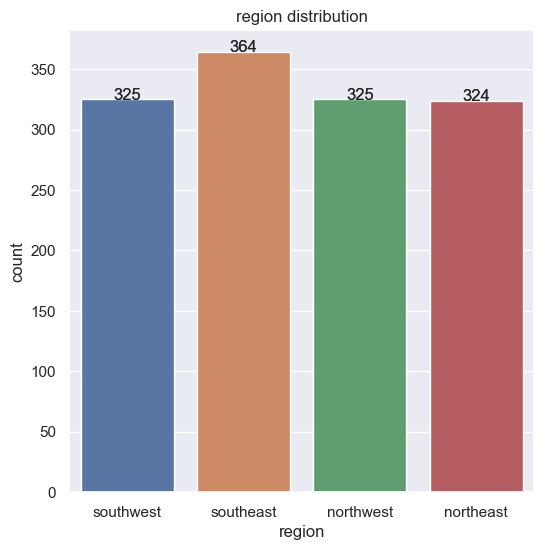

In [15]:
# Below we willl be looking for a count  of the values from each region using a countplot

plt.figure(figsize =(6,6))
sns.countplot(x='region',data=df)
plt.title('region distribution')
ax = sns.countplot(x='region', data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, height, ha="center")

plt.show()

C:\Users\stilinski\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


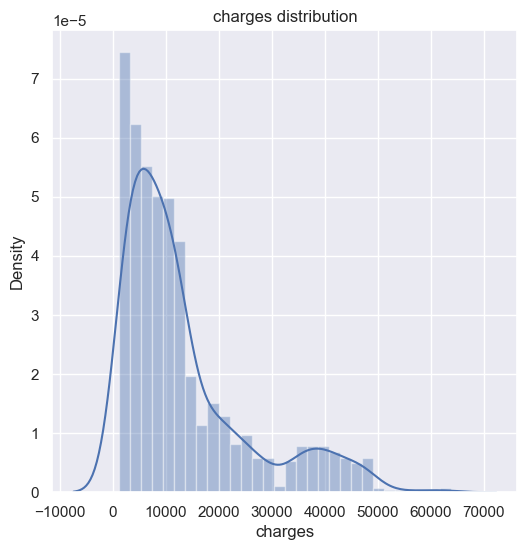

In [16]:
#below we will be looking for the charges distribution using  a distplot

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('charges distribution')
plt.show()

In [17]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [19]:
categorical_val =[]
continous_val =[]
for column in df.columns:
    if len(df[column].unique())<=10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [20]:
categorical_val 

['sex', 'children', 'smoker', 'region']

In [21]:
continous_val

['age', 'bmi', 'charges']

(7.5, -0.5)

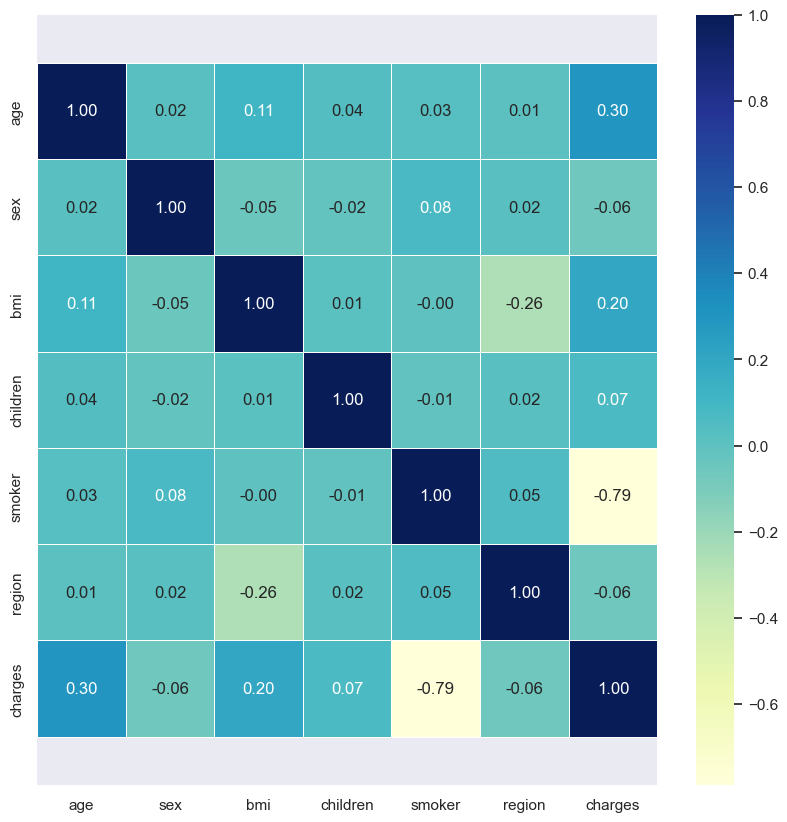

In [22]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


In [23]:
continous_val.remove('charges')
dataset = pd.get_dummies(df, columns = continous_val)
dataset.head()

,sex,children,smoker,region,charges,age_18,age_19,age_20,age_21,age_22,...,bmi_46.75,bmi_47.41,bmi_47.52,bmi_47.6,bmi_47.74,bmi_48.07,bmi_49.06,bmi_50.38,bmi_52.58,bmi_53.13
0,1,0,0,1,16884.92400,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,1725.55230,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,3,1,0,4449.46200,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,3,21984.47061,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,3,3866.85520,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# for the below code we will  be dropping the cahrges colum as we will be using it as our target data (Y)
X =df.drop(columns='charges',axis =1)
Y =df['charges']

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

## Linear Regression

In [26]:
regressor =LinearRegression()

In [27]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [28]:
Training_data_prediction=regressor.predict(X_train)

In [29]:
r2_test=metrics.r2_score(Y_train,Training_data_prediction)
print('R squared value : ',r2_test)

R squared value :  0.751505643411174


In [30]:
Test_data_prediction=regressor.predict(X_test)

In [31]:
r2_test=metrics.r2_score(Y_test,Test_data_prediction)
print('R squared value : ',r2_test)

R squared value :  0.7447273869684077


In [32]:
linear_regression =LinearRegression()
linear_regression.fit(X_train,Y_train)
linear_predictions =linear_regression.predict(X_test)
mean_absolute_error(Y_test,linear_predictions)

4267.213826730734

In [33]:
mean_absolute_error(Y_test,linear_predictions)/Y_test.mean()

0.3320344554585599

## Random Forest Regressor

In [34]:
rfr =RandomForestRegressor(n_estimators =1000)
rfr.fit(X_train,Y_train)
rfrpred =rfr.predict(X_test)
mean_absolute_error(Y_test,rfrpred)

2716.377016509176

In [35]:
mean_absolute_error(Y_test,rfrpred)/Y_test.mean()

0.21136291737875568

## XGBoost

In [36]:
from xgboost import XGBRegressor
boost_model =XGBRegressor()
boost_model.fit(X_train,Y_train)
boost_pred =boost_model.predict(X_test)
mean_absolute_error(Y_test,boost_pred)

3042.385834445195

In [37]:
mean_absolute_error(Y_test,boost_pred)/Y_test.mean()

0.2367298581352741

## SVM

In [38]:
from sklearn.svm import SVR
model =SVR()
model.fit(X_train,Y_train)
model.pred= model.predict(X_test)
mean_absolute_error(Y_test,model.pred)

8467.075338758827

Based on the four models above  we see that the model that perfoms well based on mean_squared error is the Random Forest regressor since it has the lowest mse